In [1]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
olympics = "...Project 1/athlete_events.csv"


# Read the City and Ride Data
olympics = pd.read_csv("...Project 1/athlete_events.csv")

# Print head
olympics.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
#Create a dataframe with just the data that will be used

year_event_medal_df= olympics.loc[:, ["Year","ID", "Sex", "Sport", "Age", "Height", "Weight", "Medal"]]
year_event_medal_df.head()

,Year,ID,Sex,Sport,Age,Height,Weight,Medal
0,1992,1,M,Basketball,24.0,180.0,80.0,NaN
1,2012,2,M,Judo,23.0,170.0,60.0,NaN
2,1920,3,M,Football,24.0,NaN,NaN,NaN
3,1900,4,M,Tug-Of-War,34.0,NaN,NaN,Gold
4,1988,5,F,Speed Skating,21.0,185.0,82.0,NaN


In [3]:
# Narrow data to male gymnasts
MaleGymnast_df =year_event_medal_df[((year_event_medal_df["Sport"]=="Gymnastics" ) & 
                                     (year_event_medal_df["Sex"]=="M" ))]
# Print head
MaleGymnast_df.head()

,Year,ID,Sex,Sport,Age,Height,Weight,Medal
41,1948,17,M,Gymnastics,28.0,175.0,64.0,Bronze
42,1948,17,M,Gymnastics,28.0,175.0,64.0,Gold
43,1948,17,M,Gymnastics,28.0,175.0,64.0,NaN
44,1948,17,M,Gymnastics,28.0,175.0,64.0,Gold
45,1948,17,M,Gymnastics,28.0,175.0,64.0,NaN


In [4]:
# Narrow data to gold winning male gymnasts 
MaleGymnastGold_df =year_event_medal_df[((year_event_medal_df['Medal']=="Gold") & 
                                         (year_event_medal_df["Sport"]=="Gymnastics" ) & 
                                         (year_event_medal_df["Sex"]=="M" ))]
# Print Head 
MaleGymnastGold_df.head()

,Year,ID,Sex,Sport,Age,Height,Weight,Medal
42,1948,17,M,Gymnastics,28.0,175.0,64.0,Gold
44,1948,17,M,Gymnastics,28.0,175.0,64.0,Gold
48,1948,17,M,Gymnastics,28.0,175.0,64.0,Gold
921,1912,521,M,Gymnastics,21.0,NaN,NaN,Gold
1237,1920,697,M,Gymnastics,22.0,NaN,NaN,Gold


In [5]:
# Calculate for age, height, and weight of gymnast over time
AgeAverage = MaleGymnast_df.groupby(["Year"]).mean()["Age"].rename("Age by Year")
HeightAverage = MaleGymnast_df.groupby(["Year"]).mean()["Height"].rename("Height by Year")
WeightAverage = MaleGymnast_df.groupby(["Year"]).mean()["Weight"].rename("Weight by Year")

# Create Data Frame for age, height, and weight of gymnast over time
YearTrend_df = pd.DataFrame({"Age by Year":AgeAverage, 
                             "Height by Year":HeightAverage, 
                             "Weight by Year":WeightAverage})
# Print
YearTrend_df

,Age by Year,Height by Year,Weight by Year
Year,,,
1896,24.287671,163.111111,68.000000
1900,22.212121,166.750000,64.000000
1904,25.116719,171.315789,69.400000
1906,24.671429,176.000000,76.250000
1908,23.162500,171.750000,68.833333
1912,24.206452,172.000000,73.000000
1920,26.747573,170.800000,65.000000
1924,27.589178,168.400000,NaN
1928,26.053232,168.033333,64.102564


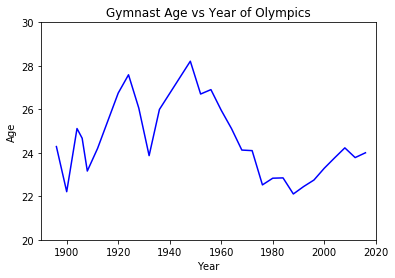

In [6]:
# Axes values
x_axis = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1996, 2000, 2004, 2008, 2012, 2016]
y_axis = YearTrend_df["Age by Year"]

#set conditions for scatter plot
plt.plot(x_axis, y_axis, c="blue", alpha=1)

#label chart
plt.title("Gymnast Age vs Year of Olympics")
plt.xlabel("Year")
plt.xlim(1890,2020)
plt.ylabel("Age")
plt.ylim(20,30)


# Save chart
plt.savefig("...Project 1/Gymnast Age vs Year of Olympics.png")

#Show chart
plt.show()

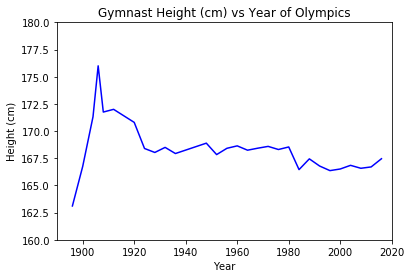

In [7]:
# Axes values
x_axis = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1996, 2000, 2004, 2008, 2012, 2016]
y_axis = YearTrend_df["Height by Year"]

#set conditions for scatter plot
plt.plot(x_axis, y_axis, c="blue", alpha=1)

#label chart  
plt.title("Gymnast Height (cm) vs Year of Olympics")
plt.xlabel("Year")
plt.xlim(1890,2020)
plt.ylabel("Height (cm)")
plt.ylim(160,180)


# Save chart
plt.savefig("...Project 1//Gymnast Height vs Year of Olympics.png")

#Show chart
plt.show()

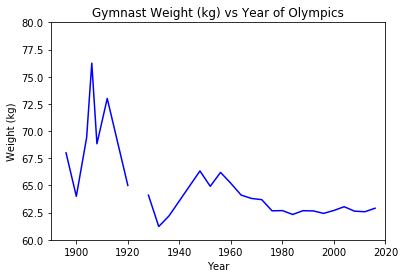

In [8]:
# Axes values
x_axis = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1996, 2000, 2004, 2008, 2012, 2016]
y_axis = YearTrend_df["Weight by Year"]

#set conditions for scatter plot
plt.plot(x_axis, y_axis, c="blue", alpha=1)

#label chart  
plt.title("Gymnast Weight (kg) vs Year of Olympics")
plt.xlabel("Year")
plt.xlim(1890,2020)
plt.ylabel("Weight (kg)")
plt.ylim(60,80)


# Save chart
plt.savefig("...Project 1/Gymnast Weight vs Year of Olympics.png")

#Show chart
plt.show()

In [9]:
#Calcualte for age, height, and weight of gold medal winners over time
GoldAgeAverage = MaleGymnastGold_df.groupby(["Year"]).mean()["Age"].rename("Gold Medal Age by Year")
GoldHeightAverage = MaleGymnastGold_df.groupby(["Year"]).mean()["Height"].rename("Gold Medal Height by Year")
GoldWeightAverage = MaleGymnastGold_df.groupby(["Year"]).mean()["Weight"].rename("Gold Medal Weight by Year")

#Create Data Frame for age, height, and weight of gold medal winners over time
GoldYearTrend_df = pd.DataFrame({"Gold Medal Age by Year":GoldAgeAverage, 
                                 "Gold Medal Height by Year":GoldHeightAverage, 
                                 "Gold Medal Weight by Year":GoldWeightAverage})
# Print 
GoldYearTrend_df

,Gold Medal Age by Year,Gold Medal Height by Year,Gold Medal Weight by Year
Year,,,
1896,25.045455,159.000000,66.800000
1900,28.000000,NaN,NaN
1904,26.736842,170.750000,71.000000
1906,24.772727,173.000000,NaN
1908,22.487179,172.000000,67.000000
1912,24.119403,172.000000,73.000000
1920,25.722222,NaN,NaN
1924,28.000000,165.000000,NaN
1928,26.142857,NaN,NaN


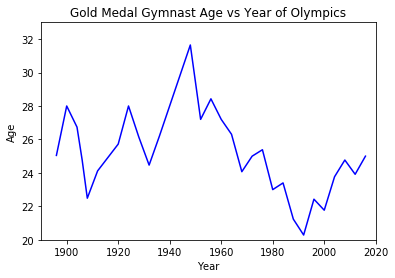

In [10]:
# Axes values
x_axis = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1996, 2000, 2004, 2008, 2012, 2016]
y_axis = GoldYearTrend_df["Gold Medal Age by Year"]

#set conditions for scatter plot
plt.plot(x_axis, y_axis, c="blue", alpha=1)

#label chart 
plt.title("Gold Medal Gymnast Age vs Year of Olympics")
plt.xlabel("Year")
plt.xlim(1890,2020)
plt.ylabel("Age")
plt.ylim(20,33)


# Save chart
plt.savefig("...Project 1/Gold Gymnast Age vs Year of Olympics.png")

#Show chart
plt.show()

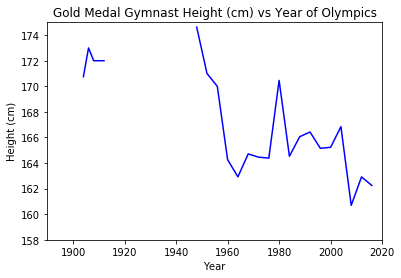

In [11]:
# Axes values
x_axis = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1996, 2000, 2004, 2008, 2012, 2016]
y_axis = GoldYearTrend_df["Gold Medal Height by Year"]

#set conditions for scatter plot
plt.plot(x_axis, y_axis, c="blue", alpha=1)

#label chart  
plt.title("Gold Medal Gymnast Height (cm) vs Year of Olympics")
plt.xlabel("Year")
plt.xlim(1890,2020)
plt.ylabel("Height (cm)")
plt.ylim(158,175)


# Save chart
plt.savefig("...Project 1/Gold Gymnast Height vs Year of Olympics.png")

#Show chart
plt.show()

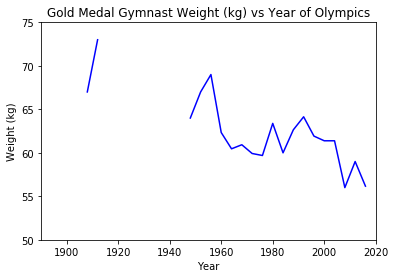

In [12]:
# Axes values
x_axis = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1996, 2000, 2004, 2008, 2012, 2016]
y_axis = GoldYearTrend_df["Gold Medal Weight by Year"]

#set conditions for scatter plot
plt.plot(x_axis, y_axis, c="blue", alpha=1)

#label chart
plt.title("Gold Medal Gymnast Weight (kg) vs Year of Olympics")
plt.xlabel("Year")
plt.xlim(1890,2020)
plt.ylabel("Weight (kg)")
plt.ylim(50,75)


# Save chart
plt.savefig("...Project 1/Gold Gymnast Weight vs Year of Olympics.png")

#Show chart
plt.show()

In [13]:
import scipy.stats as stats
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
age =[24.287671, 22.212121, 25.116719, 24.671429, 
                   23.1625, 24.206452, 26.747573, 27.589178, 26.053232, 23.871429, 25.994337, 28.213217, 
                   26.70386, 26.906393, 25.958511, 25.111881, 24.126526, 24.101136, 22.525641, 22.832677, 
                   22.84755, 22.107914, 22.449516, 22.749086, 23.28972, 23.765528, 24.228164, 23.781116, 
                   24.002092] 
goldage = [25.045455, 28, 26.736842, 24.772727, 22.487179, 24.119403, 25.722222, 28, 26.142857, 
                   24.466667, 26.2, 31.647059, 27.2, 28.428571, 27.2, 26.307692, 24.071429, 
                   25, 25.384615, 23, 23.4, 21.235294, 20.285714, 22.428571, 21.769231, 23.769231, 
                   24.769231, 23.916667, 25]
stats.ttest_ind(age, goldage, equal_var=False)

Ttest_indResult(statistic=-1.066243185384209, pvalue=0.29142383068699484)

In [14]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
height =[163.111111, 166.75, 171.315789, 176, 171.75, 172, 170.8, 168.4,
            168.033333, 168.5, 167.935065, 168.888889, 167.837638, 168.416268,
            168.639588, 168.241885, 168.426843, 168.592417, 168.305036, 168.53937,
            166.455535, 167.444604, 166.784375, 166.363901, 166.512461, 166.849379,
            166.578378, 166.703226, 167.456067] 
goldheight = [159, 0, 170.75, 173, 172, 172, 0, 165, 0, 166.777778, 0,
            174.625, 171, 170, 164.266667, 162.923077, 164.714286, 164.461538,
            164.384615, 170.461538, 164.533333, 166.058824, 166.428571, 165.153846,
            165.230769, 166.846154, 160.692308, 162.916667, 162.25]
stats.ttest_ind(height, goldheight, equal_var=False)

Ttest_indResult(statistic=2.2679007782953184, pvalue=0.031218133416509943)

In [15]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
weight =[68, 64, 69.4, 76.25, 68.833333, 73, 65, 0, 64.102564, 61.222222, 62.2,
            66.333333, 64.920152, 66.200957, 65.194508, 64.110995, 63.805281, 63.691159,
            62.664748, 62.687008, 62.330309, 62.677698, 62.657812, 62.429403, 62.699377,
            63.041925, 62.636861, 62.58042, 62.903766] 
goldweight = [66.8, 0, 71, 0, 67, 73, 0, 0, 0, 59, 0, 64, 67, 69, 
            62.333333, 60.461538, 60.928571, 59.923077, 59.692308, 63.384615,
            60, 62.647059, 64.142857, 61.923077, 61.384615, 61.384615, 56, 
            59, 56.166667]
stats.ttest_ind(weight, goldweight, equal_var=False)

Ttest_indResult(statistic=2.361748391882478, pvalue=0.023128608217415414)

In [16]:
#Playing with pivot table to see if I could get medal counts per year
medal_count = pd.pivot_table(olympics, index=["Year"], values=["Event"], columns=["Medal"], aggfunc=[len])
medal_count.head(35)

len            
       Event            
Medal Bronze Gold Silver
Year                    
1896      38   62     43
1900     175  201    228
1904     150  173    163
1906     145  157    156
1908     256  294    281
1912     300  326    315
1920     367  493    448
1924     311  332    319
1928     281  275    267
1932     232  261    246
1936     330  348    347
1948     325  330    332
1952     347  351    335
1956     348  353    342
1960     357  359    342
1964     401  408    406
1968     421  425    410
1972     485  474    455
1976     518  508    505
1980     542  529    531
1984     576  571    551
1988     637  607    601
1992     710  663    657
1994     112  110    109
1996     629  608    605
1998     150  145    145
2000     680  663    661
2002     159  162    157
2004     677  664    660
2006     175  176    175
2008     710  671    667
2010     171  174    175
2012     679  632    630
2014     198  202    197
2016     703  665    655